In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# plt.rcParams["figure.figsize"] = (12,8)
# plt.rcParams["axes.grid"] = True
import seaborn as sns
color = sns.color_palette()

# 노트북을 실행한 브라우저에서 바로 그림을 볼 수 있도록
%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

import warnings
warnings.filterwarnings("ignore")

In [2]:
# parse_dates=[""] : 날짜/시간 데이터의 경우 이를 DateTime format에 맞도록 파싱하여 읽어오는 옵션
train_df = pd.read_csv("/Users/kimjw/Desktop/Kaggle/week6/train_2016_v2.csv",
                      parse_dates=["transactiondate"])
train_df.shape

(90275, 3)

In [3]:
train_df.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90275 entries, 0 to 90274
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   parcelid         90275 non-null  int64         
 1   logerror         90275 non-null  float64       
 2   transactiondate  90275 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.1 MB


#### Logerror : 타겟 변수

Text(0, 0.5, 'logerror')

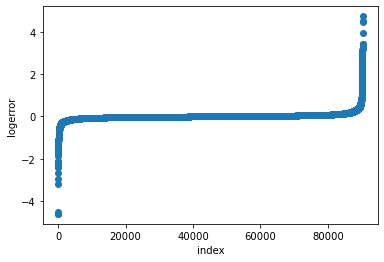

In [5]:
plt.scatter(range(train_df.shape[0]),
                  np.sort(train_df.logerror.values))
plt.xlabel("index")
plt.ylabel("logerror")

* 양쪽 끝에 이상치로 추정되는 값들이 보인다. 이상치 값을 제외하고 histogram을 그려보자

In [6]:
ulimit = np.percentile(train_df.logerror.values, 99)
llimit = np.percentile(train_df.logerror.values, 1)

In [7]:
# 99% 이상인 값은 99% 값으로 대체
train_df["logerror"][train_df["logerror"]>ulimit] = ulimit
# 1% 미만인 값은 1% 값으로 대체
train_df["logerror"][train_df["logerror"]<llimit] = llimit

Text(0.5, 0, 'logerror')

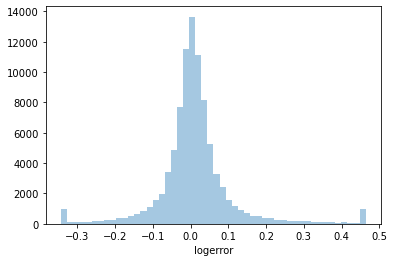

In [8]:
sns.distplot(train_df.logerror.values, bins=50, kde=False)
plt.xlabel("logerror")

* normal 분포에 가까워졌다

#### Transaction Date

In [9]:
train_df["transaction_month"] = train_df["transactiondate"].dt.month

In [10]:
# 월별 거래 수
cnt_srs = train_df["transaction_month"].value_counts()

Text(0, 0.5, 'Counts')

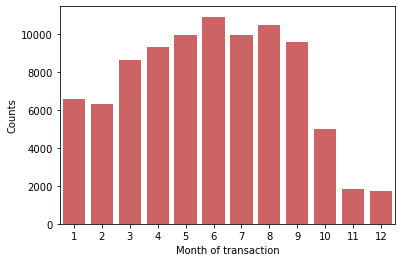

In [11]:
sns.barplot(cnt_srs.index, cnt_srs.values,
           alpha=0.8, color=color[3])
plt.xlabel("Month of transaction")
plt.ylabel("Counts")

* 데이터는 10월 15일 이전의 모든 데이터와 10월 15일 이후 약간의 데이터를 포함하고 있다
* 10월, 11월, 12월 데이터의 수는 상대적으로 적을 수밖에 없다

#### Parcel Id

In [12]:
train_df["parcelid"].value_counts().reset_index()

,index,parcelid
0,11842707,3
1,12613442,2
2,12032773,2
3,11729067,2
4,11845988,2
...,...,...
90145,11199862,1
90146,11726199,1
90147,12096888,1
90148,11181433,1


In [13]:
(train_df["parcelid"].value_counts().reset_index())["parcelid"].value_counts()

1    90026
2      123
3        1
Name: parcelid, dtype: int64

* 대부분 1번씩 거래를 진행했다

## Properties 2016

In [14]:
prop_df = pd.read_csv("/Users/kimjw/Desktop/Kaggle/week6/properties_2016.csv") 
prop_df.shape

(2985217, 58)

In [15]:
prop_df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,NaN,NaN,NaN,NaN,NaN,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,NaN,NaN,NaN,NaN,NaN,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,73026.0,NaN,NaN,73026.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,33989359.0,-118394633.0,63085.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,NaN,96095.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,NaN,5068.0,NaN,NaN,5068.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34148863.0,-118437206.0,7521.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037141e+07,12447.0,3101.0,27080.0,96424.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,1776.0,NaN,NaN,1776.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34194168.0,-118385816.0,8512.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,LAM1,6.037123e+07,12447.0,3101.0,46795.0,96450.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1947.0,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


* NaN값이 많이 보인다 -> 결측치 처리 필요

In [16]:
missing_df = prop_df.isnull().sum(axis=0).reset_index()

In [17]:
missing_df.head()

,index,0
0,parcelid,0
1,airconditioningtypeid,2173698
2,architecturalstyletypeid,2979156
3,basementsqft,2983589
4,bathroomcnt,11462


In [18]:
missing_df.columns=["col_name","missing_cnt"]
missing_df = missing_df[missing_df["missing_cnt"]>0]
missing_df = missing_df.sort_values(by="missing_cnt")

In [19]:
missing_df

,col_name,missing_cnt
35,rawcensustractandblock,11437
25,longitude,11437
24,latitude,11437
37,regionidcounty,11437
17,fips,11437
33,propertylandusetypeid,11437
52,assessmentyear,11439
5,bedroomcnt,11450
4,bathroomcnt,11462
40,roomcnt,11475


Text(0.5, 0, 'Count of missing values')

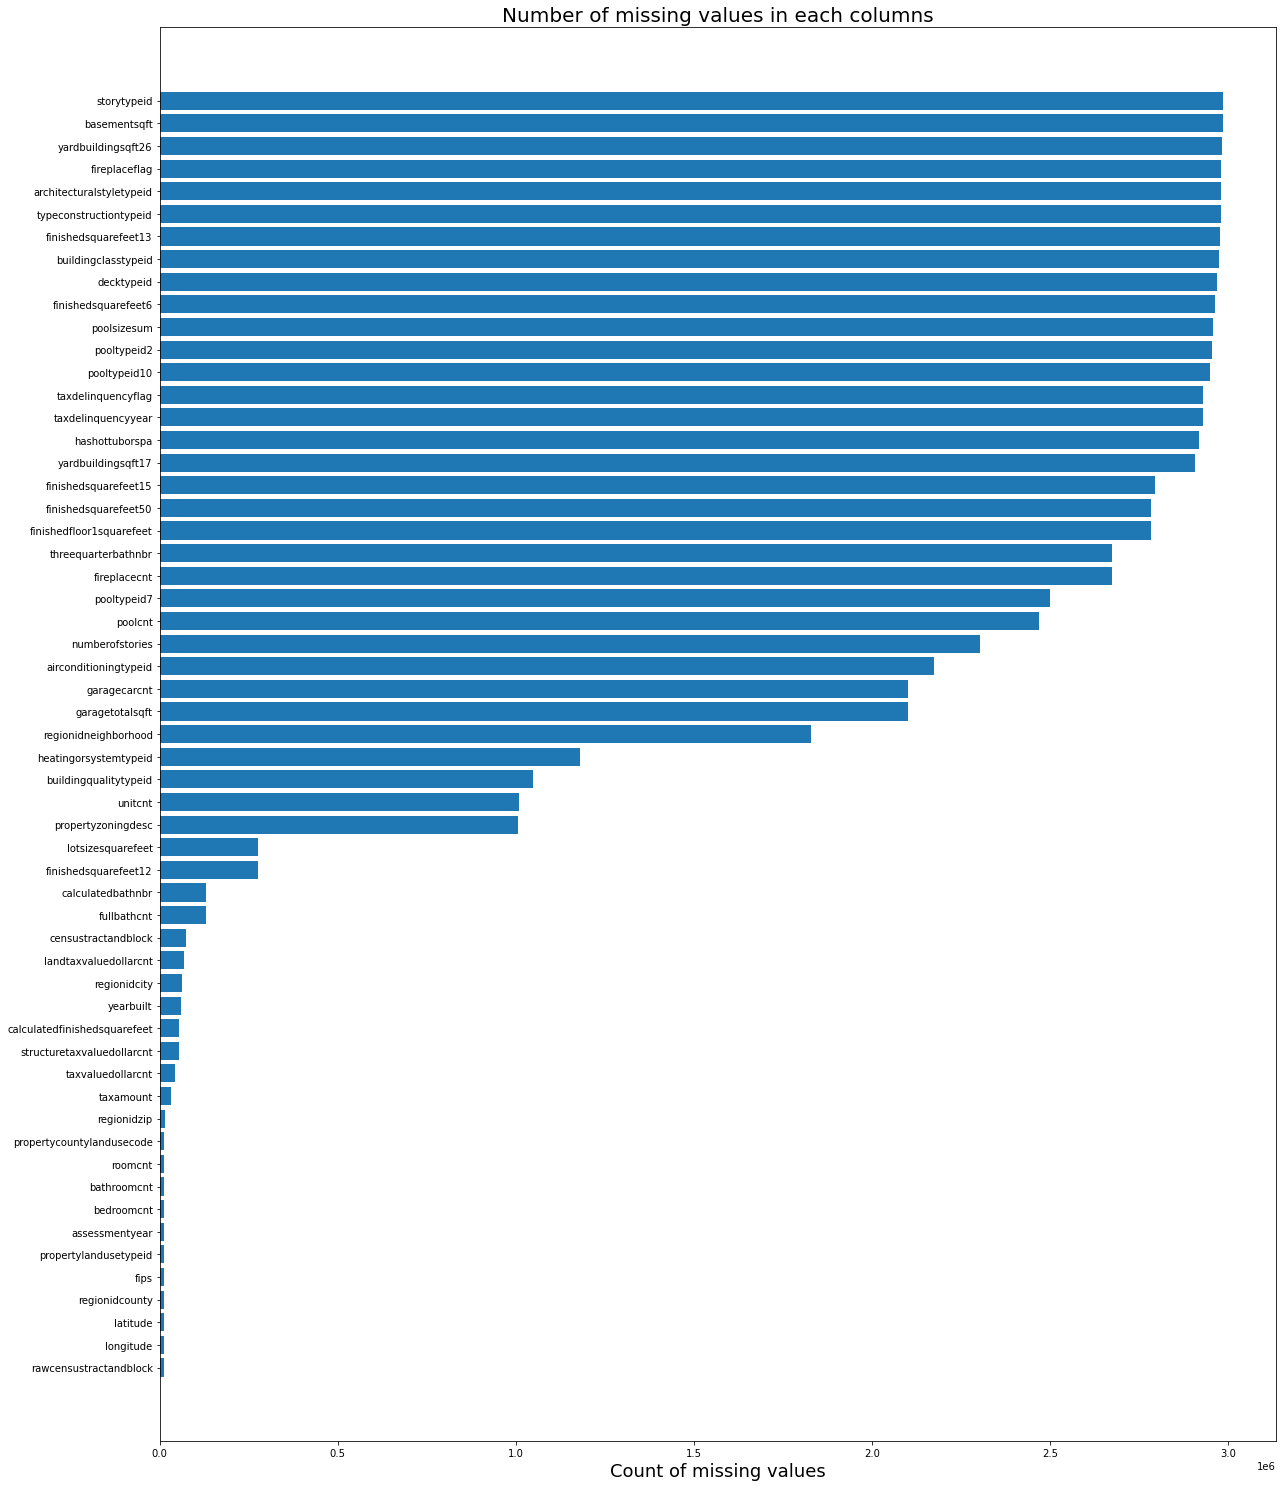

In [20]:
ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(20,26))
rects = ax.barh(ind, missing_df.missing_cnt.values)
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.col_name.values)
ax.set_title("Number of missing values in each columns", fontsize=20)
ax.set_xlabel("Count of missing values", fontsize=18)

#### Lat / Lon

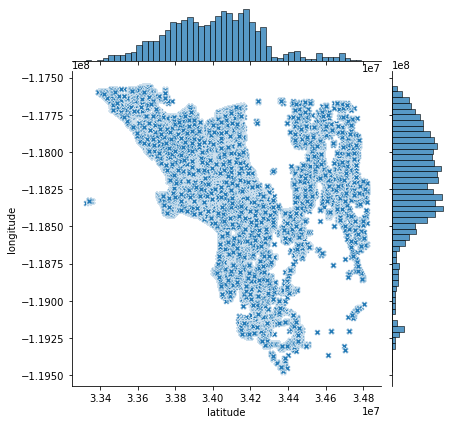

In [21]:
# scatter plot을 보여주면서 각 축별로 histogram을 보여줌
sns.jointplot(data=prop_df,
              x="latitude", 
              y="longitude",
             marker = "X",
             marginal_kws=dict(bins=50))

## Merge data

In [22]:
# parcelid기준으로 merge
train_df = pd.merge(train_df, prop_df,
                   on="parcelid",
                   how="left")
train_df.head()

,parcelid,logerror,transactiondate,transaction_month,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1,1.0,NaN,NaN,2.0,3.0,NaN,4.0,2.0,NaN,NaN,1684.0,1684.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34280990.0,-118488536.0,7528.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LARS,6.037107e+07,12447.0,3101.0,31817.0,96370.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1959.0,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,1,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,NaN,2263.0,2263.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,468.0,NaN,NaN,33668120.0,-117677556.0,3643.0,NaN,NaN,NaN,NaN,NaN,1,261.0,NaN,6.059052e+07,32380.0,1286.0,NaN,96962.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,2014.0,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1,1.0,NaN,NaN,3.0,2.0,NaN,4.0,3.0,NaN,NaN,2217.0,2217.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34136312.0,-118175032.0,11423.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,PSR6,6.037464e+07,47019.0,3101.0,275411.0,96293.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1940.0,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1,1.0,NaN,NaN,2.0,2.0,NaN,4.0,2.0,NaN,NaN,839.0,839.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,33755800.0,-118309000.0,70859.0,NaN,NaN,NaN,NaN,NaN,010C,266.0,LAR3,6.037296e+07,12447.0,3101.0,54300.0,96222.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1987.0,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,1,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,NaN,2283.0,2283.0,NaN,NaN,NaN,NaN,6059.0,NaN,2.0,2.0,598.0,NaN,NaN,33485643.0,-117700234.0,6000.0,1.0,NaN,NaN,NaN,1.0,122,261.0,NaN,6.059042e+07,17686.0,1286.0,NaN,96961.0,8.0,NaN,1.0,NaN,NaN,NaN,NaN,1981.0,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [23]:
pd.options.display.max_rows = 65

In [24]:
dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ["Col_name", "Column Type"]
dtype_df

,Col_name,Column Type
0,parcelid,int64
1,logerror,float64
2,transactiondate,datetime64[ns]
3,transaction_month,int64
4,airconditioningtypeid,float64
5,architecturalstyletypeid,float64
6,basementsqft,float64
7,bathroomcnt,float64
8,bedroomcnt,float64
9,buildingclasstypeid,float64


* 대부분 float64형
* 타입별로 카운트 해보자

In [25]:
dtype_df.groupby("Column Type").count().reset_index()

,Column Type,Col_name
0,int64,2
1,float64,53
2,datetime64[ns],1
3,object,5


* 새롭게 병합된 데이터셋에서 결측값을 찾아보자

In [26]:
missing_df = train_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ["col_name","missing_cnt"]
missing_df["missing_ratio"] = missing_df["missing_cnt"] / train_df.shape[0]
missing_df[missing_df["missing_ratio"]>0.999]

,col_name,missing_cnt,missing_ratio
6,basementsqft,90232,0.999524
9,buildingclasstypeid,90259,0.999823
16,finishedsquarefeet13,90242,0.999634
44,storytypeid,90232,0.999524


* 위의 네개 컬럼은 결측값의 비율이 99.9% 이상이다. 모델에 적용해도 되는 것일까..?

# 일변량 분석
* 변수가 너무 많기 때문에 float 변수만 가지고 타겟 변수와의 상관성을 보도록 하자.

In [27]:
# 결측값은 평균으로 대체
train_df_new = train_df.fillna(train_df.mean())
train_df_new

,parcelid,logerror,transactiondate,transaction_month,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1,1.000000,7.229885,713.581395,2.0,3.0,4.0,4.000000,2.0,66.0,1347.974037,1684.0,1684.000000,1404.545455,2380.090067,1355.546674,2302.546318,6037.0,1.187884,2.0,1.812005,345.521228,1,2.000000,34280990.0,-118488536.0,7528.0,1.0,519.827657,1.0,1.0,1.0,0100,261.0,LARS,6.037107e+07,12447.000000,3101.0,31817.000000,96370.0,0.0,7.0,1.008743,6.010033,1.000000,310.142101,311.694737,1959.0,1.440739,1,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,13.402692,6.037107e+13
1,14366692,-0.1684,2016-01-01,1,1.816372,7.229885,713.581395,3.5,4.0,4.0,5.565407,3.5,66.0,1347.974037,2263.0,2263.000000,1404.545455,2380.090067,1355.546674,2302.546318,6059.0,1.187884,3.0,2.000000,468.000000,1,3.926979,33668120.0,-117677556.0,3643.0,1.0,519.827657,1.0,1.0,1.0,1,261.0,NaN,6.059052e+07,32380.000000,1286.0,190646.540237,96962.0,0.0,7.0,1.000000,6.010033,1.110414,310.142101,311.694737,2014.0,1.440739,1,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,13.402692,6.049151e+13
2,12098116,-0.0040,2016-01-01,1,1.000000,7.229885,713.581395,3.0,2.0,4.0,4.000000,3.0,66.0,1347.974037,2217.0,2217.000000,1404.545455,2380.090067,1355.546674,2302.546318,6037.0,1.187884,3.0,1.812005,345.521228,1,2.000000,34136312.0,-118175032.0,11423.0,1.0,519.827657,1.0,1.0,1.0,0100,261.0,PSR6,6.037464e+07,47019.000000,3101.0,275411.000000,96293.0,0.0,7.0,1.008743,6.010033,1.000000,310.142101,311.694737,1940.0,1.440739,1,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,13.402692,6.037464e+13
3,12643413,0.0218,2016-01-02,1,1.000000,7.229885,713.581395,2.0,2.0,4.0,4.000000,2.0,66.0,1347.974037,839.0,839.000000,1404.545455,2380.090067,1355.546674,2302.546318,6037.0,1.187884,2.0,1.812005,345.521228,1,2.000000,33755800.0,-118309000.0,70859.0,1.0,519.827657,1.0,1.0,1.0,010C,266.0,LAR3,6.037296e+07,12447.000000,3101.0,54300.000000,96222.0,0.0,7.0,1.008743,6.010033,1.000000,310.142101,311.694737,1987.0,1.440739,1,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,13.402692,6.037296e+13
4,14432541,-0.0050,2016-01-02,1,1.816372,7.229885,713.581395,2.5,4.0,4.0,5.565407,2.5,66.0,1347.974037,2283.0,2283.000000,1404.545455,2380.090067,1355.546674,2302.546318,6059.0,1.187884,2.0,2.000000,598.000000,1,3.926979,33485643.0,-117700234.0,6000.0,1.0,519.827657,1.0,1.0,1.0,122,261.0,NaN,6.059042e+07,17686.000000,1286.0,190646.540237,96961.0,8.0,7.0,1.000000,6.010033,1.110414,310.142101,311.694737,1981.0,2.000000,1,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,13.402692,6.059042e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90270,10774160,-0.0356,2016-12-30,12,1.000000,7.229885,713.581395,1.0,1.0,4.0,4.000000,1.0,66.0,1347.974037,653.0,653.000000,1404.545455,2380.090067,1355.546674,2302.546318,6037.0,1.187884,1.0,1.812005,345.521228,1,2.000000,34203000.0,-118562000.0,93676.0,1.0,519.827657,1.0,1.0,1.0,010C,

In [28]:
x_cols = [col for col in train_df_new.columns 
          if col not in ['logerror'] 
          if train_df_new[col].dtype=='float64']
labels = []
values = []

for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(train_df_new[col].values,
                             train_df_new.logerror.values)[0,1])

    corr_df = pd.DataFrame({"col_labels": labels,
                       "corr_values": values})
corr_df = corr_df.sort_values(by="corr_values")

Text(0.5, 1.0, 'Correlation coefficient of the variables')

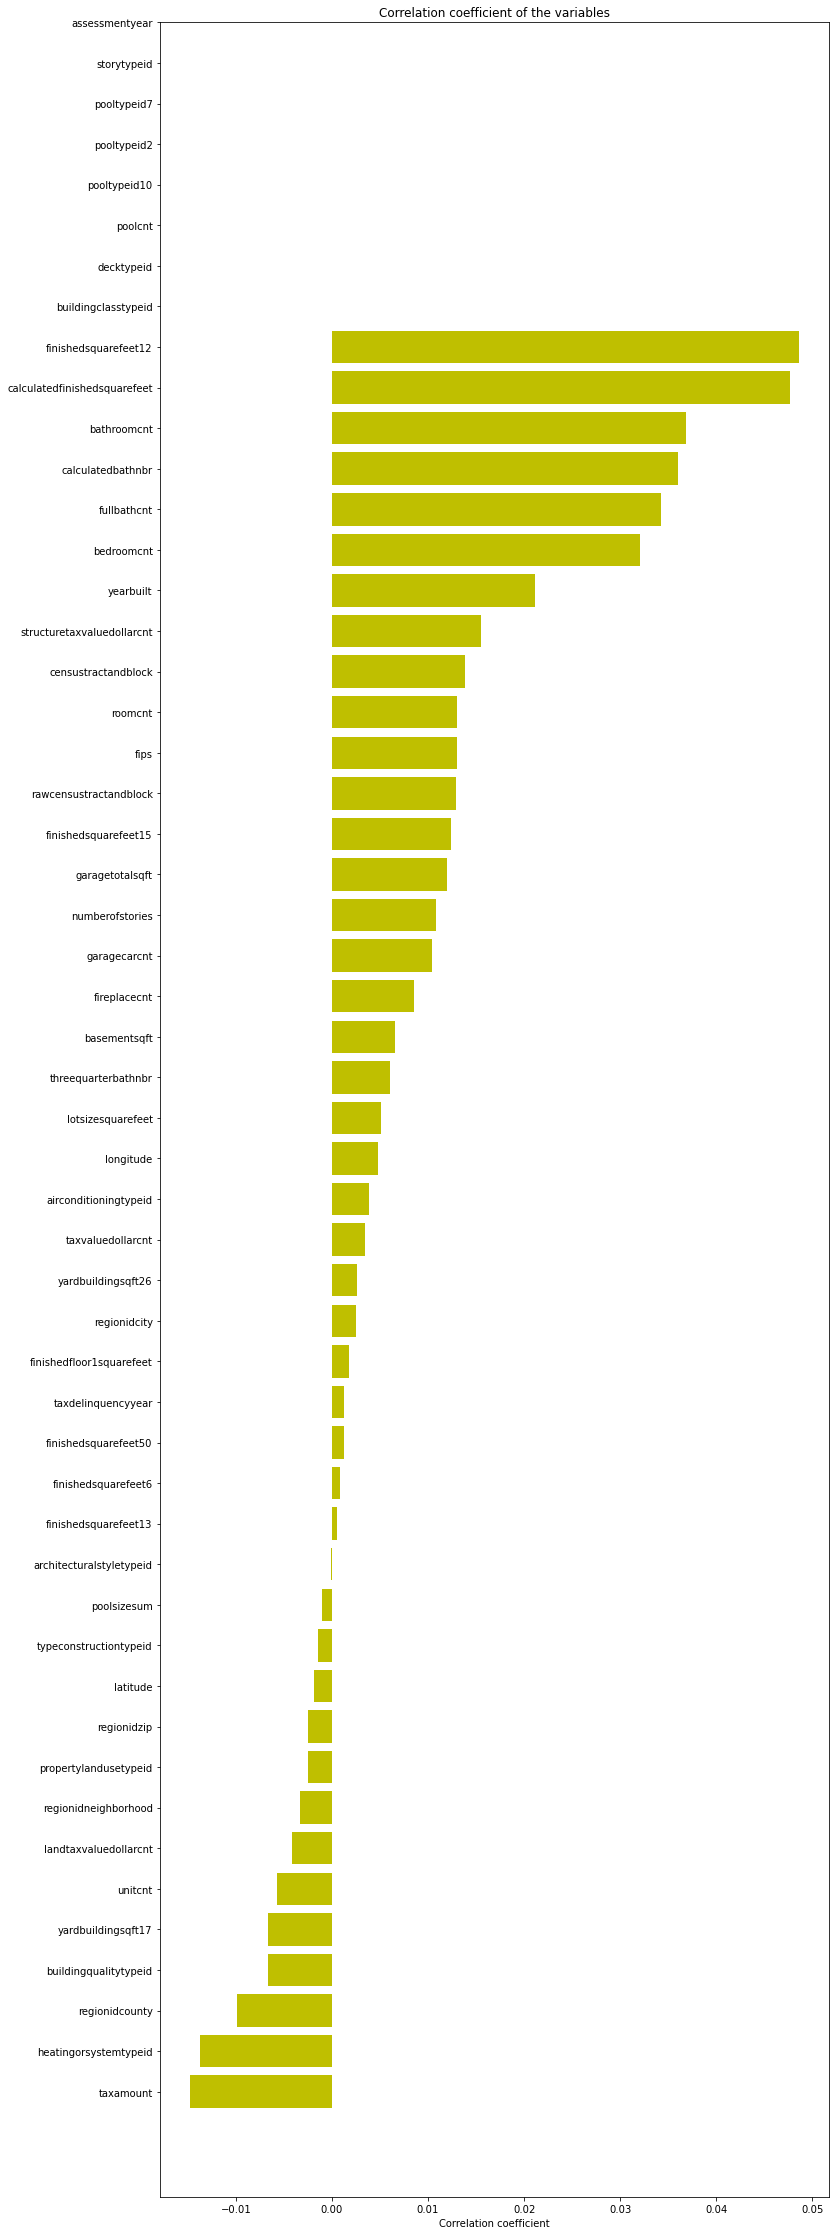

In [29]:
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(corr_df.corr_values.values),
               color = "y")
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values)
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")

* 타겟 변수와 다른 변수와의 상관관계는 상대적으로 낮다(제일 높아봤자 0.05도 안됨)
* 상단에 상관관계 값이 안나오는 변수들은 아마 하나의 고유값만 가지고 있어서 그렇 것이 아닐가 추측 -> 확인해보자

In [30]:
corr_zero_cols = ['assessmentyear', 'storytypeid', 'pooltypeid2', 'pooltypeid7', 'pooltypeid10', 'poolcnt', 'decktypeid', 'buildingclasstypeid']
for col in corr_zero_cols:
    print(col, len(train_df[col].unique()))

assessmentyear 1
storytypeid 2
pooltypeid2 2
pooltypeid7 2
pooltypeid10 2
poolcnt 2
decktypeid 2
buildingclasstypeid 2


* 확인 결과 예측한대로 모두 하나의 고유값만 있었음 -> 추후 모델링할 때 지워도 될 것 같음

In [31]:
# 상대적으로 상관관계가 높은 변수들
corr_df_high = corr_df[(corr_df["corr_values"]>0.02) |
                      (corr_df["corr_values"]<-0.01)]
corr_df_high

,col_labels,corr_values
49,taxamount,-0.014768
21,heatingorsystemtypeid,-0.013732
43,yearbuilt,0.021171
4,bedroomcnt,0.032035
18,fullbathcnt,0.034267
7,calculatedbathnbr,0.036019
3,bathroomcnt,0.036862
10,calculatedfinishedsquarefeet,0.047659
11,finishedsquarefeet12,0.048611


In [32]:
cols_to_use = corr_df_high.col_labels.tolist()

In [33]:
temp_df = train_df[cols_to_use]
# 스피어만 상관관계수(순위상관계수)를 사용한 이유가 뭘까?
corr_mat = temp_df.corr(method="spearman")
corr_mat

,taxamount,heatingorsystemtypeid,yearbuilt,bedroomcnt,fullbathcnt,calculatedbathnbr,bathroomcnt,calculatedfinishedsquarefeet,finishedsquarefeet12
taxamount,1.000000,-0.221031,0.203550,0.285575,0.432514,0.455861,0.443505,0.516136,0.525372
heatingorsystemtypeid,-0.221031,1.000000,-0.532299,-0.215818,-0.526351,-0.515775,-0.515822,-0.405923,-0.407296
yearbuilt,0.203550,-0.532299,1.000000,0.056537,0.382029,0.444999,0.443699,0.226441,0.268134
bedroomcnt,0.285575,-0.215818,0.056537,1.000000,0.563227,0.564941,0.582353,0.703075,0.710859
fullbathcnt,0.432514,-0.526351,0.382029,0.563227,1.000000,0.966628,0.966628,0.736908,0.731116
calculatedbathnbr,0.455861,-0.515775,0.444999,0.564941,0.966628,1.000000,1.000000,0.761508,0.758102
bathroomcnt,0.443505,-0.515822,0.443699,0.582353,0.966628,1.000000,1.000000,0.744390,0.754414
calculatedfinishedsquarefeet,0.516136,-0.405923,0.226441,0.703075,0.736908,0.761508,0.744390,1.000000,1.000000
finishedsquarefeet12,0.525372,-0.407296,0.268134,0.710859,0.731116,0.758102,0.754414,1.000000,1.000000


Text(0.5, 1.0, 'Important variables correlation map')

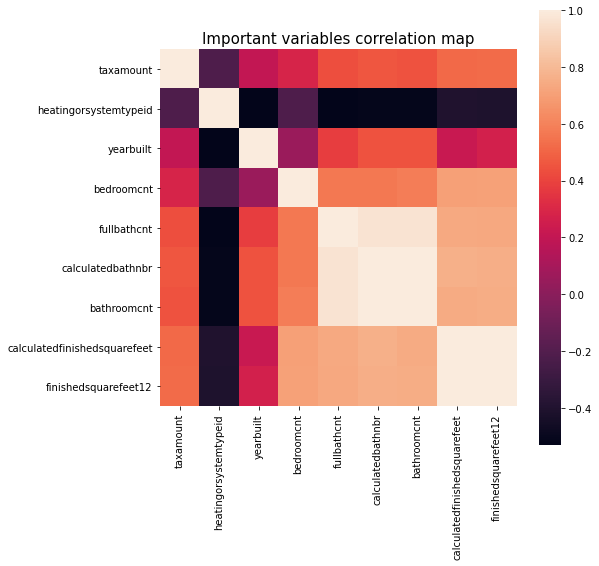

In [34]:
corrmat = temp_df.corr(method="spearman")
f, ax = plt.subplots(figsize=(8,8))

# 히트맵
sns.heatmap(corr_mat, vmax=1, square=True)
plt.title("Important variables correlation map", fontsize=15)

* 중요 변수들끼리는 상관관계가 높다
* 변수들을 하나씩 살펴보도록 하자

#### Finished SquareFeet 12

In [35]:
col = "finishedsquarefeet12"
ulimit = np.percentile(train_df[col].values, 99.5)
llimit = np.percentile(train_df[col].values, 0.5)
train_df[col][train_df[col]>ulimit] = ulimit
train_df[col][train_df[col]<llimit] = llimit

Text(0.5, 1.0, 'Finished Square feet 12 VS Log Error')

<Figure size 864x864 with 0 Axes>

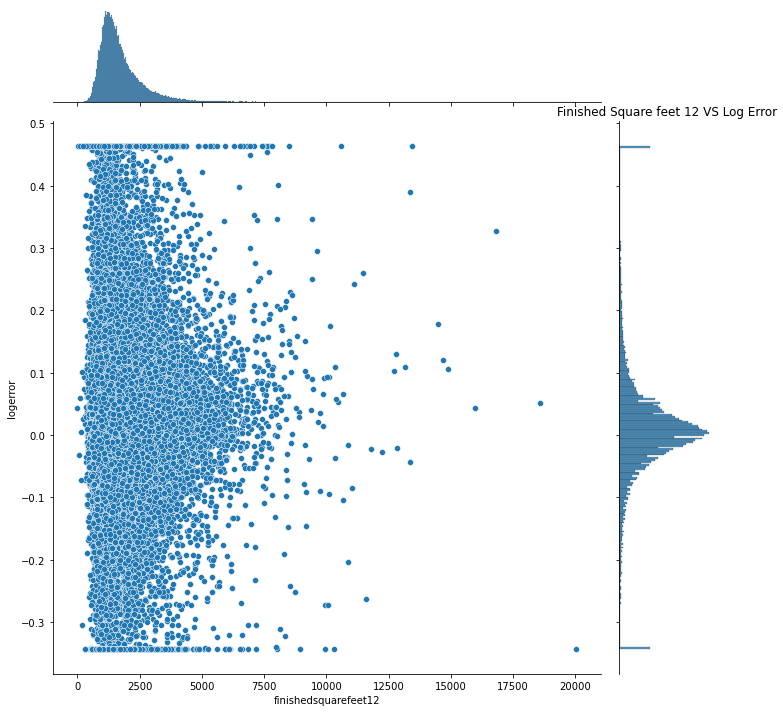

In [36]:
plt.figure(figsize=(12,12))
sns.jointplot(data=train_df,
              x=col,
              y="logerror",
              size=10)
plt.ylabel("Log Error")
plt.xlabel("Finished Square Feet 12")
plt.title("Finished Square feet 12 VS Log Error")

* "Finished Square feet 12"변수의 값이 커질수록 "log error"의 값이 줄어드는 형상인 것 같다
* 아마도 더 큰 집일수록 집값을 예측하기 쉬워서가 아닐까?

#### Calculated Finished Square Feet

Text(0.5, 1.0, 'Calculated finished square feet Vs Log error')

<Figure size 864x864 with 0 Axes>

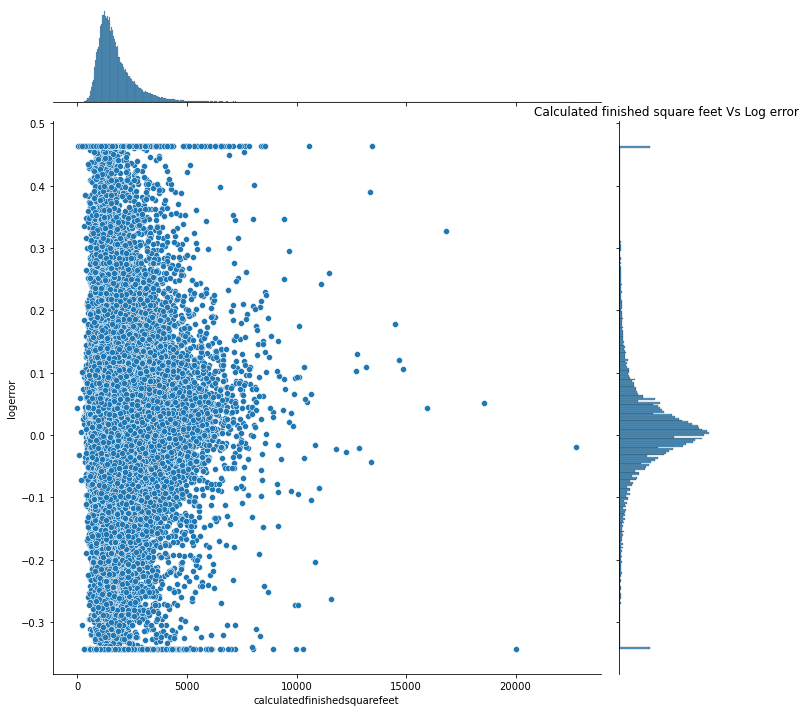

In [37]:
col = "calculatedfinishedsquarefeet"
ulimit = np.percentile(train_df[col].values, 99.5)
llimit = np.percentile(train_df[col].values, 0.5)
train_df[col][train_df[col]>ulimit] = ulimit
train_df[col][train_df[col]<llimit] = llimit

plt.figure(figsize=(12,12))
sns.jointplot(data=train_df,
              x=col,
              y="logerror",
              size=10)
plt.ylabel("Log Error")
plt.xlabel("Calculated finished square feet")
plt.title("Calculated finished square feet Vs Log error")

* 위의 결과와 유사하다
* 아마 두 변수 사이의 상관관계는 높을 것 같다 => 0.981638

#### Bathroom Count

Text(0.5, 1.0, 'Frequency of Bathroom count')

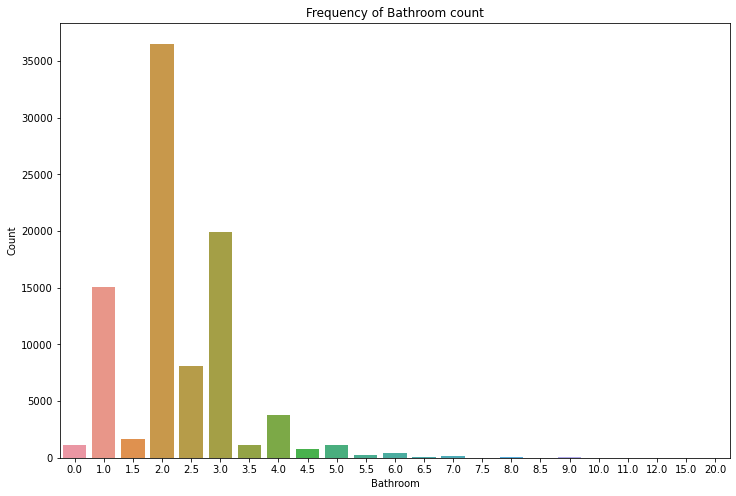

In [38]:
plt.figure(figsize=(12,8))
sns.countplot(x="bathroomcnt", data=train_df)
plt.ylabel("Count")
plt.xlabel("Bathroom")
plt.title("Frequency of Bathroom count")

* 욕실의 개수가 2개인 경우가 상당히 많다
* logerror와의 상관관계도 알아보자

Text(0.5, 1.0, 'How log error changes with bathroom count?')

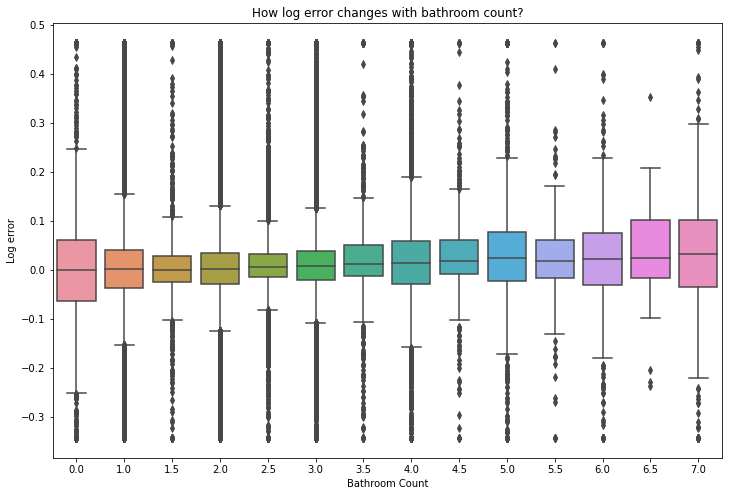

In [39]:
train_df['bathroomcnt'][train_df['bathroomcnt']>7] = 7
plt.figure(figsize=(12,8))
sns.boxplot(data=train_df,
           x="bathroomcnt", y="logerror")
plt.ylabel("Log error")
plt.xlabel("Bathroom Count")
plt.title("How log error changes with bathroom count?")

* logerror값이 대체로 -0.1~0.1 범위안에 분포되어 있다
* 욕실의 수가 적을수록 이상치가 많다고 할 수 있다?

#### Bedroom Count

Text(0.5, 1.0, 'Frequency of Bedroom count')

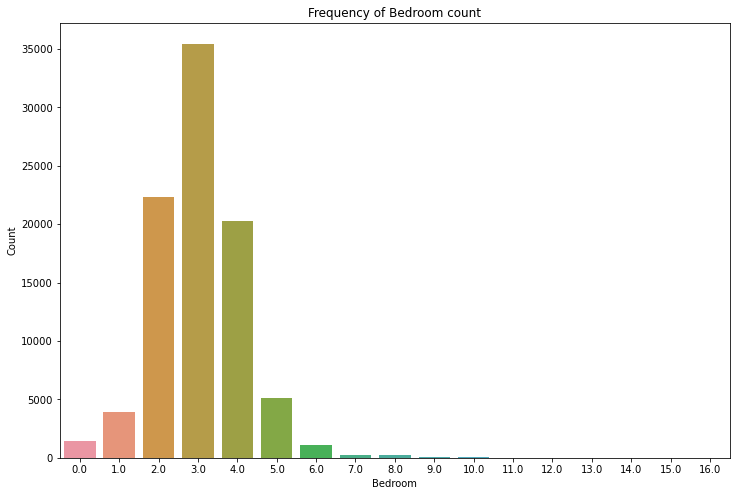

In [40]:
plt.figure(figsize=(12,8))
sns.countplot(x="bedroomcnt", data=train_df)
plt.ylabel("Count")
plt.xlabel("Bedroom")
plt.title("Frequency of Bedroom count")

* 침실의 수가 3개인 경우가 가장 많다

Text(0.5, 1.0, 'How log error changes with bedroom count?')

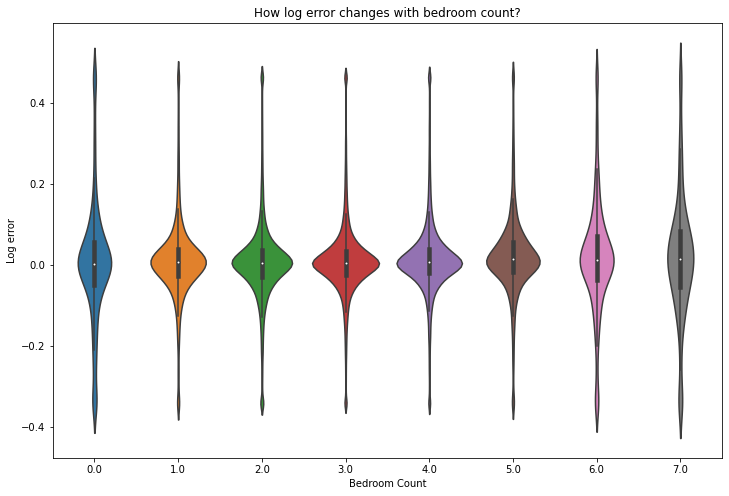

In [41]:
train_df['bedroomcnt'][train_df['bedroomcnt']>7] = 7
plt.figure(figsize=(12,8))
sns.violinplot(data=train_df,
           x="bedroomcnt", y="logerror")
plt.ylabel("Log error")
plt.xlabel("Bedroom Count")
plt.title("How log error changes with bedroom count?")

* logerror값이 대체로 -0.2~0.2 범위 안에 고르게 분포 되어있다

#### Tax amount

Text(0.5, 1.0, 'Tax Amount Vs Log error')

<Figure size 864x864 with 0 Axes>

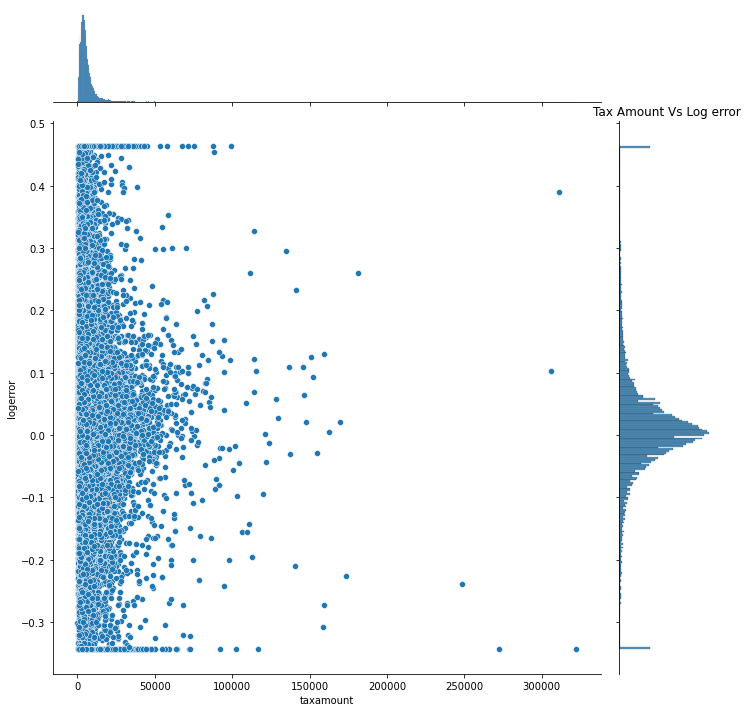

In [42]:
col = "taxamount"
ulimit = np.percentile(train_df[col].values, 99.5)
llimit = np.percentile(train_df[col].values, 0.5)
train_df[col][train_df[col]>ulimit] = ulimit
train_df[col][train_df[col]<llimit] = llimit

plt.figure(figsize=(12,12))
sns.jointplot(data=train_df,
              x=col,
              y="logerror",
              size=10)
plt.ylabel("Log Error")
plt.xlabel("Tax Amount")
plt.title("Tax Amount Vs Log error")

* 세금을 많이 낼수록 logerror가 줄어드는 형상이다

#### YearBuilt

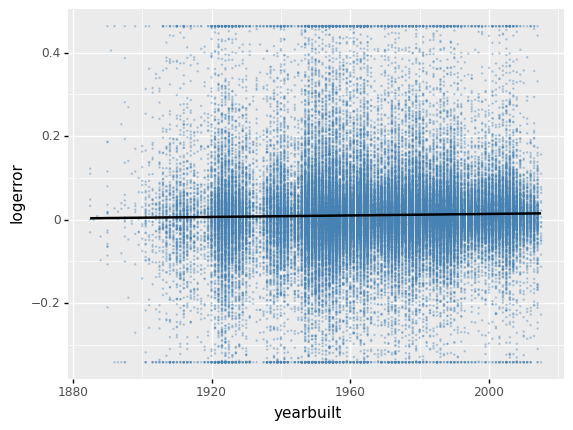

<ggplot: (8785674699319)>

In [43]:
from plotnine import *
(ggplot(aes(x='yearbuilt', y='logerror'), data=train_df) + \
    geom_point(color='steelblue', size=0.01, alpha=0.3) + \
    stat_smooth())

* 건설년도에 있어서는 조금 증가하는 추세가 보인다?

#### lat & lon

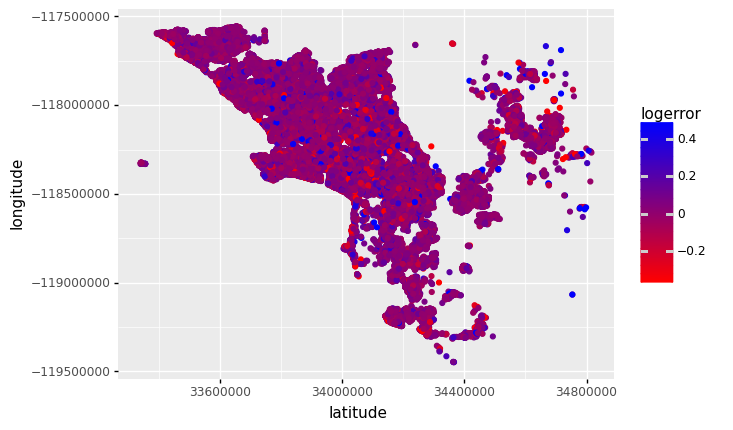

<ggplot: (8785677649972)>

In [44]:
(ggplot(train_df,aes(x="latitude",y="longitude",color="logerror"))
 + geom_point()
 + scale_color_gradient(low="red", high="blue")
)

* 위/경도상 logerror 분포의 별다른 특이점은 발견하지 못했다
* 가장 높은 상관관계(+/-)를 가진 변수들 간 패턴을 살펴보자 -> "finishedsquarefeet12"(0.048611) & "taxamount"(-0.014768)

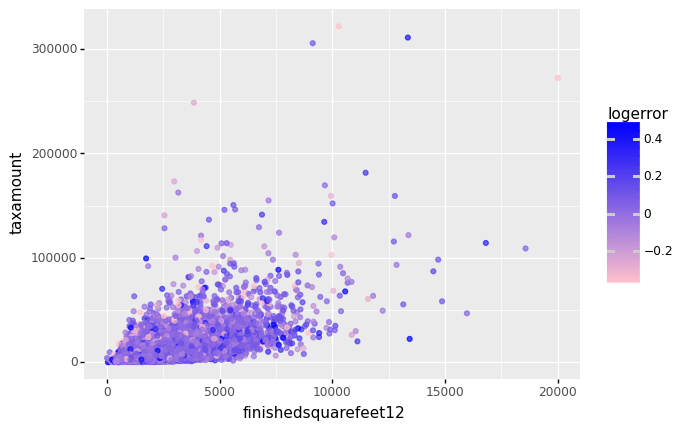

<ggplot: (8785678888698)>

In [45]:
(ggplot(train_df, aes(x="finishedsquarefeet12",y="taxamount",color="logerror"))
 + geom_point(alpha=0.7)
 + scale_color_gradient(low="pink", high="blue")
)

* 위의 그래프에도 별다른 패턴은 보이지 않는다 ->  어러운 예측이 될 것 같다

* 지금까지 중요변수에 대한 일변량 분석을 통해 패턴을 해석해보았다
* 하지만 이러한 기법은 독립성과 선형성을 가정하고 있다
* 비선형 모델을 구축해보자 -> Extra Tree Model

In [46]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   parcelid                      90275 non-null  int64         
 1   logerror                      90275 non-null  float64       
 2   transactiondate               90275 non-null  datetime64[ns]
 3   transaction_month             90275 non-null  int64         
 4   airconditioningtypeid         28781 non-null  float64       
 5   architecturalstyletypeid      261 non-null    float64       
 6   basementsqft                  43 non-null     float64       
 7   bathroomcnt                   90275 non-null  float64       
 8   bedroomcnt                    90275 non-null  float64       
 9   buildingclasstypeid           16 non-null     float64       
 10  buildingqualitytypeid         57364 non-null  float64       
 11  calculatedbathnbr           

In [47]:
train_df.select_dtypes("object").columns

Index(['hashottuborspa', 'propertycountylandusecode', 'propertyzoningdesc',
       'fireplaceflag', 'taxdelinquencyflag'],
      dtype='object')

In [68]:
train_y = train_df["logerror"]
# 카테고리형 변수 리스트
cat_cols = ['hashottuborspa', 'propertycountylandusecode', 'propertyzoningdesc',
       'fireplaceflag', 'taxdelinquencyflag']
# tree모델 분석시 target 변수, 날짜형 변수 등과 같이 필요없는 컬럼은 삭제
# 분석하고 싶은 수치형 변수만 남긴다
# axis=1: 컬럼을 삭제 / axis=0: 행을 삭제
train_df = train_df.drop(["parcelid","logerror","transactiondate","transaction_month"]+
                        cat_cols, axis=1)

KeyError: 'logerror'

In [52]:
train_y2 = train_df_new["logerror"]
# 카테고리형 변수 리스트
cat_cols = ['hashottuborspa', 'propertycountylandusecode', 'propertyzoningdesc',
       'fireplaceflag', 'taxdelinquencyflag']
# tree모델 분석시 target 변수, 날짜형 변수 등과 같이 필요없는 컬럼은 삭제
# 분석하고 싶은 수치형 변수만 남긴다
# axis=1: 컬럼을 삭제 / axis=0: 행을 삭제
train_df2 = train_df_new.drop(["parcelid","logerror","transactiondate","transaction_month"]+
                        cat_cols, axis=1)

In [53]:
feat_names = train_df2.columns
feat_names

Index(['airconditioningtypeid', 'architecturalstyletypeid', 'basementsqft',
       'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertylandusetypeid', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', 'yearbuilt',
       'numberofstories', 'structuretaxvaluedollarcnt', 'taxvalue

In [54]:
train_df2

,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
0,1.000000,7.229885,713.581395,2.0,3.0,4.0,4.000000,2.0,66.0,1347.974037,1684.0,1684.000000,1404.545455,2380.090067,1355.546674,2302.546318,6037.0,1.187884,2.0,1.812005,345.521228,2.000000,34280990.0,-118488536.0,7528.0,1.0,519.827657,1.0,1.0,1.0,261.0,6.037107e+07,12447.000000,3101.0,31817.000000,96370.0,0.0,7.0,1.008743,6.010033,1.000000,310.142101,311.694737,1959.0,1.440739,122754.0,360170.0,2015.0,237416.0,6735.88,13.402692,6.037107e+13
1,1.816372,7.229885,713.581395,3.5,4.0,4.0,5.565407,3.5,66.0,1347.974037,2263.0,2263.000000,1404.545455,2380.090067,1355.546674,2302.546318,6059.0,1.187884,3.0,2.000000,468.000000,3.926979,33668120.0,-117677556.0,3643.0,1.0,519.827657,1.0,1.0,1.0,261.0,6.059052e+07,32380.000000,1286.0,190646.540237,96962.0,0.0,7.0,1.000000,6.010033,1.110414,310.142101,311.694737,2014.0,1.440739,346458.0,585529.0,2015.0,239071.0,10153.02,13.402692,6.049151e+13
2,1.000000,7.229885,713.581395,3.0,2.0,4.0,4.000000,3.0,66.0,1347.974037,2217.0,2217.000000,1404.545455,2380.090067,1355.546674,2302.546318,6037.0,1.187884,3.0,1.812005,345.521228,2.000000,34136312.0,-118175032.0,11423.0,1.0,519.827657,1.0,1.0,1.0,261.0,6.037464e+07,47019.000000,3101.0,275411.000000,96293.0,0.0,7.0,1.008743,6.010033,1.000000,310.142101,311.694737,1940.0,1.440739,61994.0,119906.0,2015.0,57912.0,11484.48,13.402692,6.037464e+13
3,1.000000,7.229885,713.581395,2.0,2.0,4.0,4.000000,2.0,66.0,1347.974037,839.0,839.000000,1404.545455,2380.090067,1355.546674,2302.546318,6037.0,1.187884,2.0,1.812005,345.521228,2.000000,33755800.0,-118309000.0,70859.0,1.0,519.827657,1.0,1.0,1.0,266.0,6.037296e+07,12447.000000,3101.0,54300.000000,96222.0,0.0,7.0,1.008743,6.010033,1.000000,310.142101,311.694737,1987.0,1.440739,171518.0,244880.0,2015.0,73362.0,3048.74,13.402692,6.037296e+13
4,1.816372,7.229885,713.581395,2.5,4.0,4.0,5.565407,2.5,66.0,1347.974037,2283.0,2283.000000,1404.545455,2380.090067,1355.546674,2302.546318,6059.0,1.187884,2.0,2.000000,598.000000,3.926979,33485643.0,-117700234.0,6000.0,1.0,519.827657,1.0,1.0,1.0,261.0,6.059042e+07,17686.000000,1286.0,190646.540237,96961.0,8.0,7.0,1.000000,6.010033,1.110414,310.142101,311.694737,1981.0,2.000000,169574.0,434551.0,2015.0,264977.0,5488.96,13.402692,6.059042e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90270,1.000000,7.229885,713.581395,1.0,1.0,4.0,4.000000,1.0,66.0,1347.974037,653.0,653.000000,1404.545455,2380.090067,1355.546674,2302.546318,6037.0,1.187884,1.0,1.812005,345.521228,2.000000,34203000.0,-118562000.0,93676.0,1.0,519.827657,1.0,1.0,1.0,266.0,6.037132e+07,12447.000000,3101.0,40548.000000,96364.0,0.0,7.0,1.008743,6.010033,1.000000,310.142101,311.694737,1979.0,1.440739,43800.0,191000.0,2015.0,147200.0,2495.24,13.402692,6.037132e+13
90271,1.816372,7.229885,713.581395,3.0,3.0,4.0,4.000000,3.0,66.0,1347.974037,2856.0,2856.000000,1404.545455,2380.090067,1355.546674,2302.546318,6037.0,1.187884,3.0,1.812005,345.521228,2.000000,34198744.0,-118224849.0,9343.0,1.0,519.827657,1.0,1.0,1.0,261

In [55]:
from sklearn import ensemble
model = ensemble.ExtraTreesRegressor(n_estimators=25, max_depth=30,
                                    max_features=0.3, n_jobs=1,
                                    random_state=0)
model.fit(train_df2, train_y2)

ExtraTreesRegressor(max_depth=30, max_features=0.3, n_estimators=25, n_jobs=1,
                    random_state=0)

In [69]:
model.predict(train_df2)

TypeError: ('Expecting data to be a DMatrix object, got: ', <class 'pandas.core.frame.DataFrame'>)

## Feature importances

In [56]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
              axis=0)
# 중요도 기준으로 상위 20개의 인덱스 추출
# np.argsort()는 정렬된 값의 인덱스를 반환
indices = np.argsort(importances)[::-1][:20]

In [57]:
indices

array([49, 45, 48, 24, 46, 43, 10, 23, 22, 11, 35,  4, 51, 31, 34, 32, 50,
        6, 30,  3])

(-1.0, 20.0)

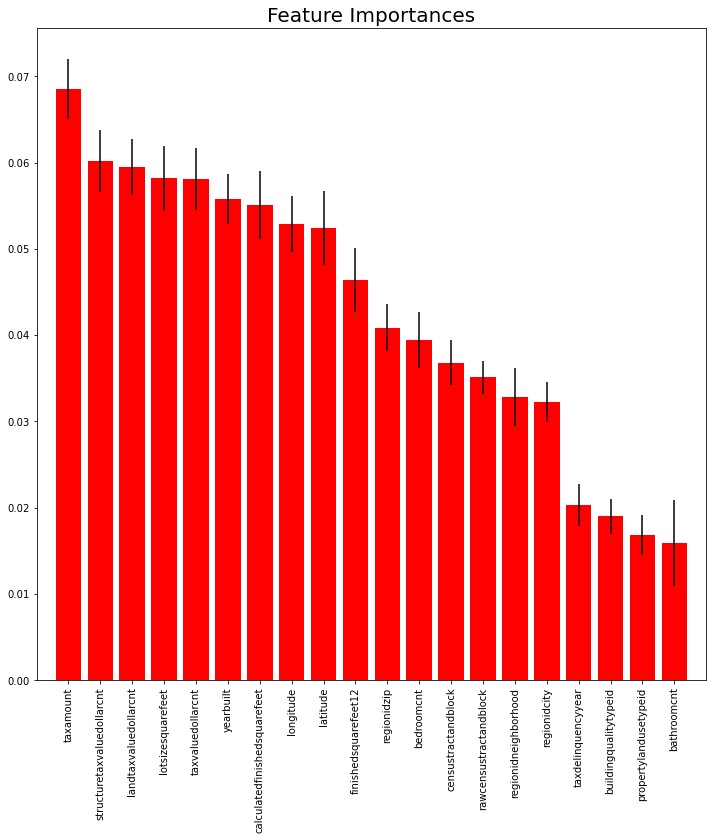

In [58]:
plt.figure(figsize=(12,12))
plt.title("Feature Importances", fontsize=20)
plt.bar(range(len(indices)), importances[indices],
       color="r",
       yerr=std[indices],
       align="center")
plt.xticks(range(len(indices)),feat_names[indices],
          rotation="vertical")
plt.xlim([-1, len(indices)])

* tax관련 변수들이 중요도가 높게 나왔다
* tax amount, structure tax value dollar count, land tax value dollor count

In [59]:
import xgboost as xgb

In [60]:
xgb_params = {
    "eta": 0.05,
    "max_depth": 8,
    "subsample": 0.7,
    "colsample_bytree": 0.7,
    "objective": "reg:linear",
    "silent": 1,
    "seed": 0
}

In [65]:
dtrain = xgb.DMatrix(train_df2, train_y2, feature_names=train_df2.columns.values)
model = xgb.train(dict(xgb_params, silent=0),
                  dtrain, num_boost_round=50)

[12:18:31] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:18:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

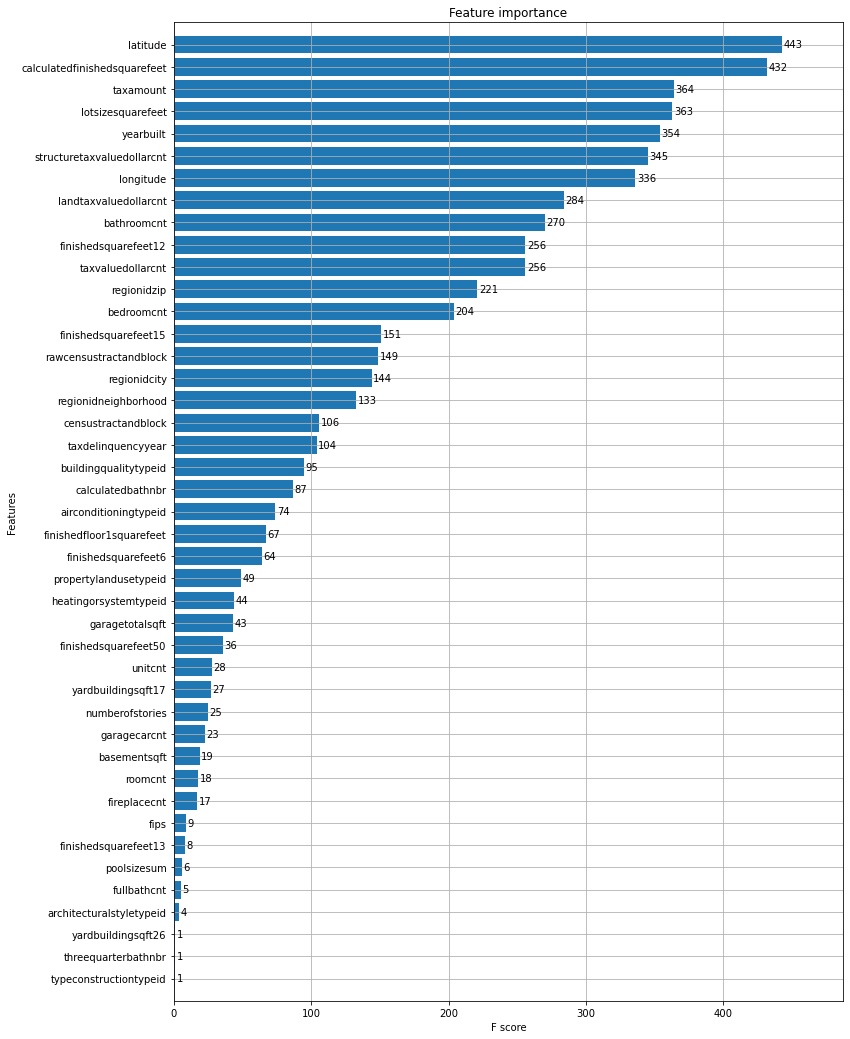

In [66]:
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50,
                   height=0.8, ax=ax)